In [11]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

## Cargar Datos

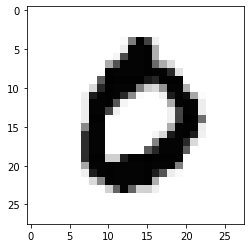

In [12]:
# Descargar el mnist de Keras
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Imprimir un sample
import matplotlib.pyplot as plt
plt.imshow(x_test[3], cmap='Greys')
plt.show()

## Normalizar Imagenes

In [13]:
# Scaling para que las imagenes queden de [0,1]
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

x_train.shape

(60000, 28, 28)

In [14]:
# Convertir las imagenes en (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

x_train.shape

(60000, 28, 28, 1)

## Etiquetas como Categoricos

In [15]:
# Numero de clases
num_classes = 10

# generar las etiquetas
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

## Arquitetura Perceptron

In [16]:
# tamano de la imagen de entrada
input_shape = (28, 28, 1)

# definicion del modelo Perceptron
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Flatten(),
        layers.Dense(200, activation="relu"),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

# Construir el modelo y ver la arquitectura
model.build(input_shape)
model.summary()

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 200)               157000    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2010      
Total params: 159,010
Trainable params: 159,010
Non-trainable params: 0
_________________________________________________________________


## Entrenar la Red Neuronal

In [17]:
# Definir los parametros de optimizacion y perdida del modelo (con CrossValidation)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# ejecutar training
model.fit(x_train, y_train, epochs=10, batch_size=250, verbose=1, validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 1s 19us/sample - loss: 0.4405 - acc: 0.8811 - val_loss: 0.2265 - val_acc: 0.9381
Epoch 2/10
48000/48000 [==============================] - 0s 7us/sample - loss: 0.1998 - acc: 0.9432 - val_loss: 0.1636 - val_acc: 0.9547
Epoch 3/10
48000/48000 [==============================] - 0s 7us/sample - loss: 0.1467 - acc: 0.9585 - val_loss: 0.1403 - val_acc: 0.9593
Epoch 4/10
48000/48000 [==============================] - 0s 7us/sample - loss: 0.1130 - acc: 0.9681 - val_loss: 0.1184 - val_acc: 0.9655
Epoch 5/10
48000/48000 [==============================] - 0s 7us/sample - loss: 0.0914 - acc: 0.9747 - val_loss: 0.1106 - val_acc: 0.9678
Epoch 6/10
48000/48000 [==============================] - 0s 7us/sample - loss: 0.0764 - acc: 0.9787 - val_loss: 0.1015 - val_acc: 0.9695
Epoch 7/10
48000/48000 [==============================] - 0s 7us/sample - loss: 0.0641 - acc: 0.9816 - val_loss: 0.0952 -

## Evaluar el Modelo

In [18]:
# Obtener el score obtenido del modelo
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.08442011674847454
Test accuracy: 0.9734


## Predecir una Imagen

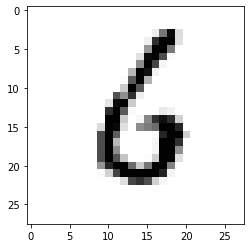

[[2.4955319e-03 6.6986249e-06 1.5989256e-04 4.3631246e-04 1.6916445e-05
  7.6953747e-04 9.9609780e-01 8.6354248e-07 1.4046967e-05 2.4949093e-06]]


In [25]:
# obtener una imagen del dataset
(_, _), (x_test, y_test) = keras.datasets.mnist.load_data()

ind = 50

testimg = x_test[ind]

# imprimir
plt.imshow(x_test[ind], cmap='Greys')
plt.show()

# normalizar la imagen y expandirla
testimg = testimg.astype("float32") / 255
testimg = np.expand_dims(testimg, -1)

# generar las probabilidades
y_pred = model.predict(np.array([testimg]))

# imprimir la lista de probabilidades
print(y_pred)

In [26]:
# argmax saca la clase con la probabilidad mas alta
y_class = y_pred.argmax(axis=-1)

# imprimir la clase
print("Prediccion:",y_class[0])

Prediccion: 6
